![Cover Photo](image.jpg)

# **1.0 About Author**
- **Project:** Google Play Store Apps - EDA
- **Author:** Faizan Ahmad
- **Code Submission Date:** June 12th, 2024
  
**Author's Contact Info:**
[Email](ma143faizan@gmail.com),
[Github](https://github.com/fitfaizan),
[Kaggle](https://www.kaggle.com/virtualcrush),
[Linkedin](https://www.linkedin.com/in/fitfaizan)

# **2.0 About Data**
- **Google Play Store Apps** (Web scraped data of 10k Play Store apps for analysing the Android market).
- **Data Age:** Updated 5 years ago.
- **Dataset:** 🔗 [*link*](https://www.kaggle.com/datasets/lava18/google-play-store-apps/data?select=googleplaystore.csv)
- **Context:**
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.
- **Content**
Each app (row) has values for catergory, rating, size, and more.
- **Acknowledgements**
This information is scraped from the Google Play Store. This app information would not be available without it.


## **2.1 Task:**
We intend to conduct an Exploratory Data Analysis (EDA) on the given dataset. The EDA will serve as the basis for the necessary Data Wrangling activities to be carried out for the purposes of data cleaning and normalization. During the coding process, we will document our observations. Ultimately, we will produce a summary and draw conclusions from our findings

## **2.2 Objectives:**
The primary aim of this project is to conduct a thorough analysis of the dataset to identify significant insights. The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## **2.3 Kernel Version Used:**
- Python 3.11.5

# **3.0 *Import Libraries***
- We will use the follwoing libraries
    1. Warnings: To avoid any warning messages.
    2. Pandas: Data manipulation and analysis library.
    3. Numpy: Numerical computing library.
    4. Matplotlib: Data visualization library.
    5. Seaborn: Statistical data visualization library.
    6. WordCloud: Data visualization library for text data.


In [350]:
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

# importing libraries for data manipulation
import pandas as pd
import numpy as np

# importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# **4.0  Data Loading, Exploration & Wrangling**

## **4.1 Load the csv file with the pandas:**

In [271]:
# loading data from csv file
df = pd.read_csv("./google_play_apps/googleplaystore.csv")

## **4.2 Creating the dataframe and understanding the data present in the dataset. (Getting a sneak peek of data):** 
With just a few lines of code! Quickly view the top and bottom rows of dataset to get a sense of what you're working with, without having to scroll through the entire file.

In [272]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [273]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands: 


This code snippet helps us get a complete overview of the data by adjusting a key display setting in Pandas. By setting the option to show all columns, we can ensure that no valuable information is overlooked when working with dataframes. Whether exploring data, conducting analyses or simply trying to get a better sense of it, this simple line of code can make a big difference.

In [274]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe

## **4.3 Analyzing & describing the dataset:**

- Before loading this dataset, I went and manually inspected the dataset to see if I can find any abnormalities. Here's one I found: There is one particular row in the dataset that is misaligned. Better option here is to drop that row before doing any further analysis using Python.

In [275]:
# dropping the misaligned row
df.drop([10472], axis = 0, inplace = True)
df.reset_index(inplace=True)

### **4.3.1 View the `.info()` of data:**
This code snippet provides a quick summary of the DataFrame, including the number of non-null entries in each column, the data type of each column, and the memory usage of the DataFrame. Using the `.info()` method is essential for getting a concise overview of the dataset, helping us identify missing values, understand the structure of data, and prepare for further data cleaning and analysis tasks.

In [276]:
# using the info command to check the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10840 non-null  object 
 5   Size            10840 non-null  object 
 6   Installs        10840 non-null  object 
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [277]:
# dropping the index column
df.drop(['index'], axis = 1, inplace = True)

In [278]:
# to get unique values of each column in the dataset
cols = df.columns
for col in cols:
    print(col, "Total Unique Values:", df[col].nunique())
    print(col, "Unique Values:", df[col].unique())
    print("\n")

App Total Unique Values: 9659
App Unique Values: ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']


Category Total Unique Values: 33
Category Unique Values: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Rating Total Unique Values: 39
Rating Unique Values: [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2. 

---
#### **Observation Set 1:**
##### **What each column represents:**
1. **App:** The name of the mobile application.
2. **Category:** The category under which the app is classified.
3. **Rating:** The average user rating of the app, measured on a scale of 1 to 5.
4. **Reviews:** The number of user reviews the app has received.
5. **Size:** The size of the app in megabytes.
6. **Installs:** The number of times the app has been installed.
7. **Type:** Indicates whether the app is free or paid.
8. **Price:** The price of the app (if it is not free).
9. **Content Rating:** The age group for which the app is suitable.
10. **Genres:** The genres associated with the app.
11. **Last Updated:** The date when the app was last updated.
12. **Current Ver:** The current version of the app.
13. **Android Ver:** The minimum Android OS version required to run the app.

##### **Other observations:**
1. The data is showing data types of columns different than they are supposed to be.
     - **Reviews** column should be of dtype numeric.
     - **Size** column should be of dtype numeric.
     - **Installs** column should be of dtype numeric.
     - **Price** column should be of dtype numeric.
     - **Last Updated** column should be of dtype datetime.
2. There are some missing values in a few columns, we need to take a look at them as well.
     - **Rating**, **Type**, **Current Ver**, **Android Ver** are the columns with missing values.
3. Total number of unique values in **App column** are less than total rows, so there must be some duplicated rows.
4. **Size column** has inconsistent values. 
      - The values in kB should be converted to MB and it would also be better to rename this column.
      - The value "Varies with device" should be replaced by np.nan and then either imputed by mean or it should be dropped.
5. To convert **Installs column** to numeric, we need to remove + and , signs from it.
6. To convert **Price column** to numeric, we need to remove $ sign.
7. The **Android Ver column** has some inconsistent values that should be dealt with based on goals.
8. The **Rating column** has a lot of missing values. It might be because the app is not yet been installed enough times for it to have at least a few number of reviews. Another reason can be presence of duplicate rows.
---

#### **Tasks:** Fixing all the issues seen during **observation set 1**.

In [279]:
# Task 1: Changing Reviews column data type
df['Reviews'] = df['Reviews'].astype(float)

In [280]:
# Task 2: Changing Size column data type and other issues
# removing k from column and dividing by 0124 to convert into MB
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', ''))/1024 if 'k' in str(x) else x)
# removing M from column 
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('M', '')) if 'M' in str(x) else x)
# replacing varies with device by the mean of column values
df['Size'] = df['Size'].replace('Varies with device', np.nan)
# # imputing nan values with mean of column values
df['Size'] = df['Size'].fillna(df['Size'].mean())
# converting into numeric data type
df['Size'] = df['Size'].astype(float)
# rounding off the values to 2 decimal places
df['Size'] = df['Size'].round(2)

# renaming the column to follow an appropriate naming convention
df.rename(columns = {'Size':'Size_mb'}, inplace = True)


In [281]:
# Task 3: Fixing the Installs column
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [282]:
# Task 4: Fixing the Price column
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].apply(lambda x: float(x))
df.rename(columns = {'Price':'Price_usd'}, inplace = True)

In [283]:
# Task 5: Fixing the Last Updated column - Converting to only date format and don't include time
df['Last Updated'] = pd.to_datetime(df['Last Updated']).dt.date

In [284]:
# Task 6: Dealing with missing values
# Fxing the Type column
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size_mb,Installs,Type,Price_usd,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,21.52,0.0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


In [285]:
# It would be better to just drop this column
df.dropna(subset=['Type'], inplace=True)

In [286]:
# Ratings column has a lot of missing values
df[df.Rating.isnull()].head(10)

,App,Category,Rating,Reviews,Size_mb,Installs,Type,Price_usd,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61.0,7.0,100000.0,Free,0.0,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182.0,5.7,100000.0,Free,0.0,Everyone 10+,Beauty,2017-09-20,8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119.0,3.7,50000.0,Free,0.0,Everyone,Beauty,2018-07-23,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654.0,7.4,100000.0,Free,0.0,Teen,Beauty,2018-07-17,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77.0,2.9,10000.0,Free,0.0,Mature 17+,Beauty,2017-08-08,2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35.0,3.1,10000.0,Free,0.0,Everyone 10+,Beauty,2017-12-11,2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30.0,9.9,10000.0,Free,0.0,Mature 17+,Beauty,2018-01-24,3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161.0,2.7,10000.0,Free,0.0,Everyone,Books & Reference,2018-07-13,1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2.0,7.2,50000.0,Free,0.0,Everyone,Books & Reference,2018-06-15,3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114.0,7.3,100000.0,Free,0.0,Everyone,Books & Reference,2015-08-07,1.1,5.1 and up


---
#### My observation was correct: the rows that have this are those in which the app reviews count is so low that rating can't be exactly calculated based on them. I'll be dropping all such rows because we can't take guesses on how an app should be rated. 
---

In [287]:
# Dropping such rows
df.dropna(subset=['Rating'], inplace=True)

In [288]:
# Current Ver column missing values check
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size_mb,Installs,Type,Price_usd,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2.70,5000.0,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145.0,0.01,1000000.0,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010.0,8.70,500000.0,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179.0,14.00,50000.0,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up


In [289]:
# imputing 1.0.0 as current version for such rows
df['Current Ver'].fillna('1.0.0', inplace=True)

In [290]:
# Android Ver column missing values check
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size_mb,Installs,Type,Price_usd,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11.0,1000.0,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1,10000.0,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN


In [291]:
# imputing with mode and also fixing varies with device value issue
df['Android Ver'].replace('Varies with device', np.nan, inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

In [292]:
# Task 7: App column - Cleaning
df[df.duplicated(subset=['App'], keep=False)].sort_values(by=['App','Reviews']).head(10)

,App,Category,Rating,Reviews,Size_mb,Installs,Type,Price_usd,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26.0,1000000.0,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26.0,1000000.0,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8,1000.0,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8,1000.0,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506.0,15.0,100000.0,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506.0,15.0,100000.0,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246.0,25.0,10000000.0,Free,0.00,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521.0,25.0,10000000.0,Free,0.00,Everyone,Sports,2018-07-29,5.5.9,4.1 and up


---
#### It is clear that there are quite some duplicated rows in the dataset. We'll drop all the duplicate rows and keep just one of them. 
---

In [293]:
# Dropping all duplicate rows but keeping the one with the maximum reviews
df.sort_values(by='Reviews', ascending=False, inplace=True)
df.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [294]:
# resetting the index 
df.reset_index(drop=True, inplace=True)

> ## Milestone 1: *Fixed all the issues found in observation set 1.* 

### **4.3.2 Descriptive Statistics:**
We use descriptive statistics to summarize and understand the key features of dataset.

In [295]:
# describe() function to get the summary of the dataframe
df.describe()

,Rating,Reviews,Size_mb,Installs,Price_usd
count,8196.000000,8.196000e+03,8196.000000,8.196000e+03,8196.000000
mean,4.173267,2.555008e+05,21.724090,9.189442e+06,1.035447
std,0.536253,1.985709e+06,21.043228,5.826274e+07,16.857244
min,1.000000,1.000000e+00,0.010000,1.000000e+00,0.000000
25%,4.000000,1.270000e+02,5.800000,1.000000e+04,0.000000
50%,4.300000,3.017000e+03,18.000000,1.000000e+05,0.000000
75%,4.500000,4.397675e+04,27.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


---
#### **Observation Set 2:**
1. The minimum rating in our dataset is 1.0. This is because we removed all apps without a rating.
2. Less than 25% of apps have a rating below 4.0.
3. As the number of reviews increases, so does the rating. Similarly, as installs increase, ratings improve. It’s intuitive: more installs lead to more reviews, and good reviews lead to more installs, boosting both rating and review counts.
4. The average app size is 21.72 MB with a standard deviation of 21.04 MB. Thus, the optimal app size should range between 1 MB to 40 MB.
5. The largest app size in the dataset is 100 MB.
6. Over 75% of apps are free.
7. Only a small percentage of apps are paid, with the highest price being $400. The average price ranges from $1 to $18 based on mean and standard deviation.
8. The maximum number of reviews for an app in the dataset is approximately 78 million. The maximum number of installs is 1 billion.

##### **Other Observations:**
- **Rating Distribution**: The average rating is 4.17, indicating generally positive feedback. The median rating is 4.30, with a standard deviation of 0.54, showing that most ratings are close to the mean.
- **Review Variability**: The standard deviation for reviews is approximately 1.99 million, indicating a wide range of review counts among apps.
- **Install Variability**: The number of installs varies widely, with a standard deviation of approximately 58 million.
- **Price Distribution**: The median price is $0.00, confirming that most apps are free. The 25th and 75th percentiles also support this, with prices at $0.00.
---

> ## Milestone 2: *Got the statistical summary of almost all the information needed from the dataset.* 

# **5.0 Question and Aswers:**           
> We are going to pose following questions against the dataset:
1. **Which category has the maximum number of apps (most dense)?**
2. **Which are the top-10 rated apps?**
3. **Which category has the most top rated apps?**
4. **Which category's app has the maximum reviews?**
5. **What is the average size of apps with the maximum installs, ratings, and reviews?**
6. **What is the highest paid app and its reviews count, installs count, and rating?**
7. **What are the apps with the maximum installs?**
8.  **Which content rating has the maximum installs and reviews, and the best ratings?**
9.  **What is the distribution of app prices?**
10. **What is the relationship between app size and rating?**
11. **How does the number of reviews vary across different categories?**
12. **What is the trend of app ratings over time (based on the 'Last Updated' column)?**
13. **Which apps have the highest number of installs in the "Games" category?**
14. **What is the average rating per app category?**
15. **What is the median number of reviews for each category?**
16. **How does the average price vary across different app categories?**
17. **Which app categories have the largest average size?**
18. **What is the relationship between app price and rating?**
19. **Which categories have the highest percentage of paid apps?**
---


## 5.0.1 Which category has the maximum number of apps (most dense category)?

In [296]:
# to find the most dense category
df['Category'].value_counts().sort_values(ascending=False)

Category
FAMILY                 1652
GAME                    898
TOOLS                   720
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         298
MEDICAL                 290
PHOTOGRAPHY             263
BUSINESS                263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           149
DATING                  133
MAPS_AND_NAVIGATION     118
EDUCATION               104
FOOD_AND_DRINK           94
ENTERTAINMENT            87
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           61
ART_AND_DESIGN           59
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64

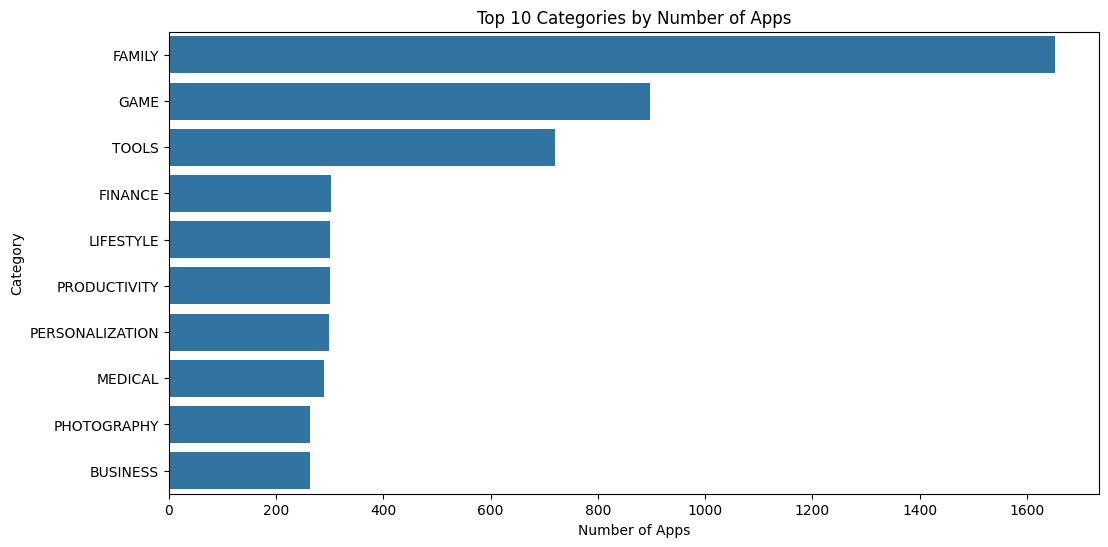

In [297]:
# Visual representation of top 10 categories in sorted order
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().head(10).index)
plt.title('Top 10 Categories by Number of Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

> **Figure-1:** Provide us the visual on the number of apps in sorted order in each category.

### **Answer:** The most dense category for total apps present in it is the **FAMILY**. It has a total of **1652** apps in it. 
---

## 5.0.2 Which are the top-10 rated apps?

In [298]:
# top 10 rated apps with 5.0 rating
df[df['Rating'] == 5.0].sort_values(by='Reviews', ascending=False).head(10)

,App,Category,Rating,Reviews,Size_mb,Installs,Type,Price_usd,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6074,Ríos de Fe,LIFESTYLE,5.0,141.0,15.00,1000.0,Free,0.0,Everyone,Lifestyle,2018-03-24,1.8,4.1 and up
6275,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104.0,2.30,1000.0,Free,0.0,Everyone,Finance,2018-08-07,2.1.0,4.1 and up
6280,Oración CX,LIFESTYLE,5.0,103.0,3.80,5000.0,Free,0.0,Everyone,Lifestyle,2017-09-12,5.1.10,4.1 and up
6294,Barisal University App-BU Face,FAMILY,5.0,100.0,10.00,1000.0,Free,0.0,Everyone,Education,2018-05-06,3.1.1,4.0.3 and up
6354,Master E.K,FAMILY,5.0,90.0,21.52,1000.0,Free,0.0,Everyone,Education,2017-08-11,1.5.0,4.4 and up
6757,CL REPL,TOOLS,5.0,47.0,17.00,1000.0,Free,0.0,Everyone,Tools,2018-04-10,1.0.19,4.1 and up
6793,AJ Cam,PHOTOGRAPHY,5.0,44.0,2.80,100.0,Free,0.0,Everyone,Photography,2018-01-23,1.0,4.1 and up
6799,CS & IT Interview Questions,FAMILY,5.0,43.0,3.30,1000.0,Free,0.0,Everyone,Education,2018-03-27,1.1,4.2 and up
6801,Ek Vote,PRODUCTIVITY,5.0,43.0,6.20,500.0,Free,0.0,Everyone,Productivity,2017-11-07,1.1,4.0.3 and up
6808,AI Today : Artificial Intelligence News & AI 101,NEWS_AND_MAGAZINES,5.0,43.0,2.30,100.0,Free,0.0,Everyone,News & Magazines,2018-06-22,1.0,4.4 and up


### **Answer:** The apps that are top rated (5.0 / 5.0) with maximum reviews are:
1. **Ríos de Fe**
2. **FD Calculator (EMI, SIP, RD & Loan Eligilibility)** 
3. **Oración CX** 
4. **Barisal University App-BU Face** 
5. **Master E.K** 
6. **CL REPL** 
7. **AJ Cam** 
8. **CS & IT Interview Questions** 
9. **Ek Vote** 
10. **AI Today : Artificial Intelligence News & AI 101**

---
### **Interesting Observation: 🔍** The apps that have a rating of 5.0 tend to have lower numbers of reviews and installs compared to other apps. As the number of installs and reviews increases, there is often a tendency for some users to give slightly lower ratings to the app. This can cause the overall rating to drop below 5.0.
---


## 5.0.3 Which category has the most top rated apps?

In [299]:
# to find the category with most number of 5.0 rated apps - in terms of percentage
df[df['Rating'] == 5.0]['Category'].value_counts(normalize=True).head(10)

Category
FAMILY                0.247232
LIFESTYLE             0.107011
MEDICAL               0.092251
BUSINESS              0.066421
TOOLS                 0.062731
GAME                  0.044280
HEALTH_AND_FITNESS    0.044280
PERSONALIZATION       0.036900
PRODUCTIVITY          0.029520
SOCIAL                0.029520
Name: proportion, dtype: float64

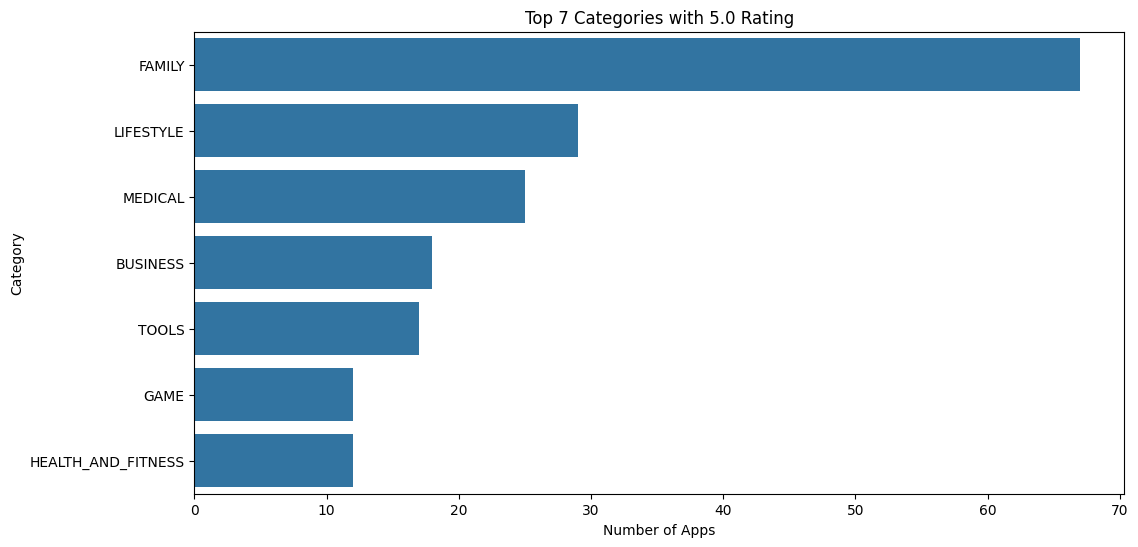

In [300]:
# Visualizing the output and displaying the top 7 categories with 5.0 rating
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df[df['Rating'] == 5.0], order=df[df['Rating'] == 5.0]['Category'].value_counts().head(7).index)
plt.title('Top 7 Categories with 5.0 Rating')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

> **Figure-2:** Provide us the visual on the number of apps with 5.0 rating in each category.

### **Answer:** The category that has the maximum percentage of apps with 5.0 rating is **FAMILYL**. This category has over 67 apps (25% apps) with 5.0 rating.
---

## 5.0.4 Which category's app have the maximum reviews?

In [301]:
# to find which category app has the maximum number of reviews
df.groupby('Category')['Reviews'].max().sort_values(ascending=False).head(10)

Category
SOCIAL                78158306.0
COMMUNICATION         69119316.0
GAME                  44893888.0
TOOLS                 42916526.0
VIDEO_PLAYERS         25655305.0
NEWS_AND_MAGAZINES    11667403.0
PHOTOGRAPHY           10859051.0
FAMILY                10216997.0
TRAVEL_AND_LOCAL       9235373.0
PERSONALIZATION        7464996.0
Name: Reviews, dtype: float64

In [302]:
# app that has the maximum number of reviews in the category 
df[df['Category'] == 'SOCIAL'].sort_values(by='Reviews', ascending=False)['App'].head(10)

0                            Facebook
2                           Instagram
12                           Snapchat
36                      Facebook Lite
65                                 VK
68     Tik Tok - including musical.ly
89                            Google+
100                         Pinterest
116      Tango - Live Video Broadcast
117    Badoo - Free Chat & Dating App
Name: App, dtype: object

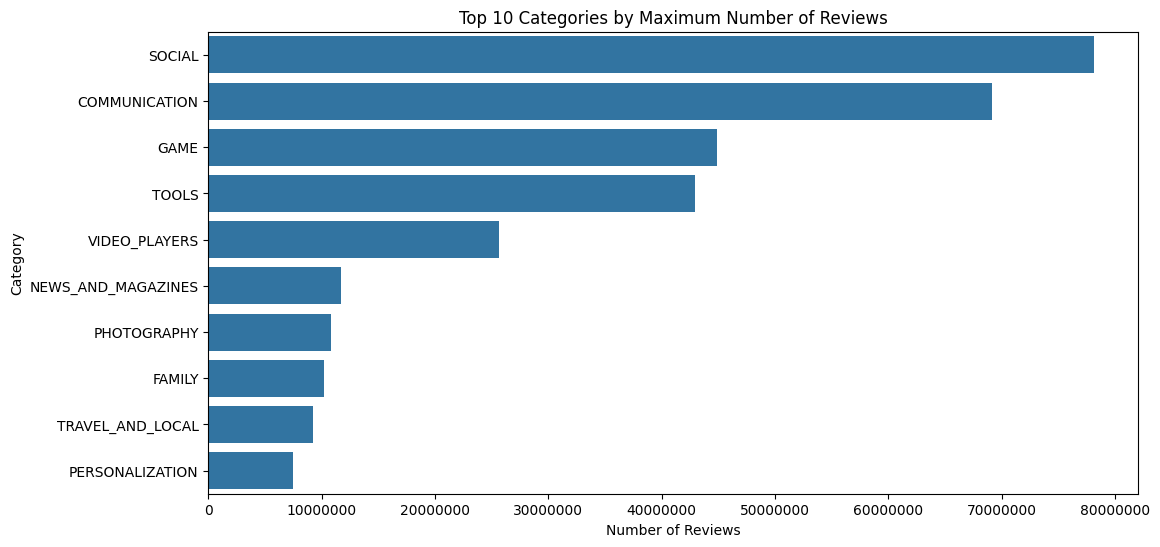

In [303]:
# Visual representation of top 10 categories with maximum number of reviews
plt.figure(figsize=(12, 6))
sns.barplot(x='Reviews', y='Category', data=df, estimator=max, ci=None, order=df.groupby('Category')['Reviews'].max().sort_values(ascending=False).head(10).index)
plt.title('Top 10 Categories by Maximum Number of Reviews')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Number of Reviews')
plt.ylabel('Category')
plt.show()

> **Figure-3:** Provide us the visual on top 10 categories that have maximum number of reviews in their apps.

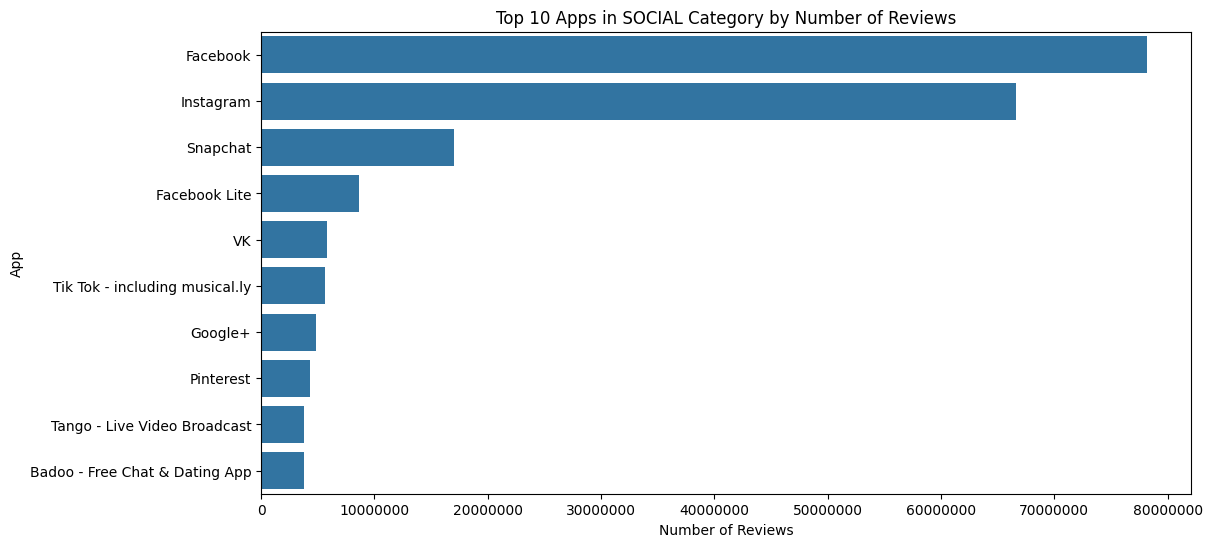

In [304]:
# visual representation of each top app in the SOCIAL category
plt.figure(figsize=(12, 6))
sns.barplot(x='Reviews', y='App', data=df[df['Category'] == 'SOCIAL'].sort_values(by='Reviews', ascending=False).head(10))
plt.title('Top 10 Apps in SOCIAL Category by Number of Reviews')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.show()

> **Figure-4:** Provide us the visual on top 10 apps in the SOCIAL Category by number of reviews.

### **Answer:** The app that has the maximum reviews (over 78+ million reviews) is **Facebook** and it is present in the **SOCIAL** category of the dataset.
---

## 5.0.5 What is the average size of apps with the maximum installs, ratings, and reviews?

In [351]:
# average size of apps that have highest number of installs, rating and reviews
max_installs = df['Installs'].max()
df_installs = df[df['Installs'] == max_installs]
print("The average size of apps that have the highest number of installs is:" , round(df_installs['Size_mb'].mean(),2))

The average size of apps that have the highest number of installs is: 23.82


In [352]:
max_rating = df['Rating'].max()
df_rating = df[df['Rating'] == max_rating]
print("The average size of apps that have the highest rating is:" , round(df_rating['Size_mb'].mean(),2))

The average size of apps that have the highest rating is: 14.23


In [353]:
max_reviews = df['Reviews'].max()
df_reviews = df[df['Reviews'] == max_reviews]
print("The average size of apps that have the highest number of reviews is:" , round(df_reviews['Size_mb'].mean(),2))

The average size of apps that have the highest number of reviews is: 21.52


### **Answer:** The average size of apps that have the highest number of installs is: **23.82 MB**. The average size of apps that have the highest rating is: **14.23 MB**. The average size of apps that have the highest number of reviews is: **21.52 MB**.
---

## 5.0.6 What is the highest paid app and its reviews count, installs count, and rating?

In [354]:
# highest price in the dataset
max_price = df['Price_usd'].max()
# all apps that have the highest price
df[df['Price_usd'] == max_price]

# print("The highest price of an app in the dataset is: $", max_price, "and the app is", df[df['Price_usd'] == max_price]['App'].values[0], ". It has a total of ", df[df['Price_usd'] == max_price]['Reviews'].values[0], "reviews and", df[df['Price_usd'] == max_price]['Installs'].values[0], "installs.", "The rating of this app is", df[df['Price_usd'] == max_price]['Rating'].values[0],".")

,App,Category,Rating,Reviews,Size_mb,Installs,Type,Price_usd,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5635,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up


### **Answer:** The highest price of an app in the dataset is: $ 400.0 and the app is **"I'm Rich - Trump Edition"**. It has a total of  275 reviews and 10000 installs. The rating of this app is 3.6 
---


## 5.0.7 What are the apps with the maximum installs?

In [347]:
# apps with max installs
max_installs = df['Installs'].max()
df_installs = df[df['Installs'] == max_installs]
df_installs[['App','Category','Installs']].reset_index(drop=True)

,App,Category,Installs
0,Facebook,SOCIAL,1.000000e+09
1,WhatsApp Messenger,COMMUNICATION,1.000000e+09
2,Instagram,SOCIAL,1.000000e+09
3,Messenger – Text and Video Chat for Free,COMMUNICATION,1.000000e+09
4,Subway Surfers,GAME,1.000000e+09
5,YouTube,VIDEO_PLAYERS,1.000000e+09
6,Google Photos,PHOTOGRAPHY,1.000000e+09
7,Skype - free IM & video calls,COMMUNICATION,1.000000e+09
8,Google Chrome: Fast & Secure,COMMUNICATION,1.000000e+09
9,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,1.000000e+09


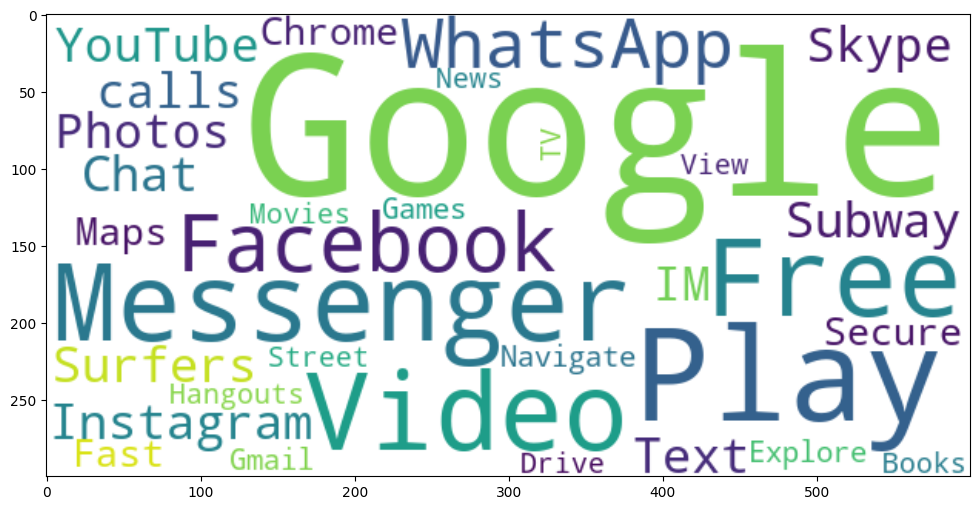

In [349]:
# visually representing the top apps with maximum installs - Word cloud
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(' '.join(df_installs['App']))
plt.imshow(wordcloud, interpolation='bilinear')

> **Figure-5:** Provide us the visual of words in the df_installs app names to identify which words exist here.

### **Answer:** The apps with the maximum number of installs (1,000,000,000) in the given dataset are:

- **Facebook**
- **WhatsApp Messenger**
- **Instagram**
- **Messenger – Text and Video Chat for Free**
- **Subway Surfers**
- **YouTube**
- **Google Photos**
- **Skype - free IM & video calls**
- **Google Chrome: Fast & Secure**
- **Maps - Navigate & Explore**
- **Google**
- **Google Play Games**
- **Google+**
- **Gmail**
- **Hangouts**
- **Google Drive**
- **Google Street View**
- **Google Play Books**
- **Google Play Movies & TV**
- **Google News**
---

## 5.0.8 Which content rating has the maximum installs and reviews, and the best ratings?

- Answer 10: 
> Few interesting points that needs further analysis and attention. What kind of apps that falls under the category of Business & Utilities and are bought by or for Children

# Facts:
- ⚠️ Caution: The content rating attribute may not always provide reliable information.
- 🚸 Be aware: An app rated 9+ could contain inappropriate content, such as an e-book with mature themes.

# **7.0 Summary**

The EDA exercise conducted on the Apple App Store dataset has yielded numerous interesting insights. The dataset was found to be relatively clean and consistent throughout the analysis. We posed several questions to the dataset and provided detailed answers and findings as follows:


Q1. What are the top 10 categories with the most downloads from the Apple Store?\
A1: Gaming apps are the most downloaded apps from the store.

Q2. What are the top 10 primary genres with the highest average user rating?\
A2: The highest rated primary genres based on average user rating are Weather, Games, Photo & Videos, Music, Books, and References, among others.

Q3. Which primary genre has the highest count of paid and free apps?\
A3: The list of free apps includes Games, Business, Education, Utilities, and Lifestyle, while the list of paid apps includes Education, Games, Utilities, Stickers, and Productivity.

Q4. What are the top 5 paid apps with the highest ratings?\
A4: The top 5 paid apps with the highest ratings are Super Nano Trucks, FarRock Dodgeball, Money Easy - Expense Tracker, Money Flow - Expense Tracker, and Sketch Ideas.

Q5. What are the top 5 free apps with the highest ratings?\
A5: The top 5 free apps with the highest ratings are Rise of Zombie - City Defense, Dog Wheelchairs, Dog App - Breed Scanner, Dojo Login 2, and Dojo Hero.

Q6. What are the apps with the highest content rating?\
A6: The apps with the highest content rating are for children, adults, teens, and everyone, with a breakdown based on the count of apps under each category.

Q7. In which years were the most apps released?\
A7: The year 2020 saw the highest number of app releases, likely due to the COVID-19 pandemic and more people staying at home.

Q8. How does the size of an app in MBs compare to its price?\
A8: We tried to find a correlation between app size and price but found that, except for a few exceptions, the size of the app is irrelevant to the price.

Q9. Who are the top 10 app-producing developers?\
A9: The top 10 app-producing developers are ChowNow, Touch2Success, Alexander Velimirovic, MINDBODY, Incorporated, Phorest, OFFLINE MAP TRIP GUIDE LTD, Magzter Inc., ASK Video, RAPID ACCELERATION INDIA PRIVATE LIMITED, and Nonlinear Educating Inc.

Q10. What types of genres attract which types of clients in terms of revenue?\
A10: Some interesting points need further analysis and attention, such as what kind of Business & Utilities apps are bought by or for children. It was found that the information stored in the content rating attribute is not very reliable and that there is a possibility that an app is rated for 9+ but is actually an e-book with unsuitable topics.

Q11. How do app releases per content rating compare year on year?\
A11: Clearly, the children's category is taking the lead, but as pointed out earlier, the content rating of non-kids apps is also rated under the children's category.

Q12. How does user rating compare to price?\
A12: The higher the user rating, the higher the price of the app.

Q13. How does user rating compare to MB size?\
A13: The higher the user rating, the larger the size in MB of the app.

Q14. How do YoY breakdowns per genre based on app price compare?\
A14: Educational apps contribute more revenue in terms of app sales.

Q16. Interdependency of numeric attributes on each other\
Answer 16: Few attributes show strong dependence on each other, except for Average_User_Rating and Current_Version_Score.

---
---

# **8.0 Conclusion & Findings**

#### The primary goal of this project is to analyze the Apple App Store dataset and identify insights based on the data. By doing so, we aim to project customer dynamics and demands to developers and relevant stakeholders, helping them generate more business for their upcoming applications.


> During this EDA exercise, we have achieved several milestones:

- We have cleaned the dataset from null values.
- No duplications have been found. Although the app names have duplications, they are unique records with different versions, AppIds, and release dates.

> Our findings include:

- Gaming apps are the most downloaded apps from the store.
- The top 10 highest rated primary genres based on average user ratings are Weather, Games, Photo & Videos, Music, and Books.
  
It is important to note that the information stored in the content rating attribute may not always be reliable. There is a possibility that an app rated for 9+ may contain unsuitable topics, such as e-books.